> <h1> MODELING </h1>

This notebook is focused on making sure that my dataset is encoded properly so that it can be modeled with sklearn. Then I modeled my dataset and computed the associated accuracy scores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score 
from sklearn.cross_validation import LeaveOneOut
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
email_data_frame = pd.read_csv("/data/thenateandre/email_data_frame.csv")

In [4]:
# Removing unnecessary columns from the dataframe.

email_data_frame = email_data_frame.drop(email_data_frame.columns.values[0], axis=1)
email_data_frame = email_data_frame.drop(['email'], axis=1)

In [5]:
email_data_frame.head()

,MIME,Subscribe,Unsubscribe,Mailer,Priority,content,day,from,hour,html_use,label,main_message_extra_score,main_message_nwas_score,re,receive_count,subject_line_extra_score,subject_line_nwas_score
0,1,0,0,0,3,multipart/mixed,5,com,1,0,0,0.670096,0.591313,0,2,0.670096,0.591313
1,1,0,0,1,1,text/plain,1,com,0,0,0,0.789154,0.674667,0,8,0.687633,0.567793
2,1,1,1,0,3,multipart/signed,6,org,3,0,1,0.463395,0.377856,1,11,0.572255,0.465104
3,1,0,0,1,3,text/plain,2,com,0,0,0,0.842464,0.821000,0,7,0.817109,0.811058
4,0,0,0,0,3,none,2,com,5,0,0,0.753900,0.619219,0,4,0.786136,0.786136


In [6]:
# Saving the label data as a separate pandas series and then dropping that column.

email_y = email_data_frame['label']
email_data_frame = email_data_frame.drop(['label'], axis=1)

In [7]:
# Using pandas one hot encoding.

email_data_frame = pd.get_dummies(email_data_frame, columns=['content', 'from'], drop_first=True)
email_data_frame.head()

,MIME,Subscribe,Unsubscribe,Mailer,Priority,day,hour,html_use,main_message_extra_score,main_message_nwas_score,...,from_th,from_tm,from_to,from_tr,from_tw,from_uk,from_us,from_uy,from_yu,from_za
0,1,0,0,0,3,5,1,0,0.670096,0.591313,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0.789154,0.674667,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,3,6,3,0,0.463395,0.377856,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,3,2,0,0,0.842464,0.821000,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,2,5,0,0.753900,0.619219,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# All of the columns after one hot encoding.

email_data_frame.columns

Index(['MIME', 'Subscribe', 'Unsubscribe', 'Mailer', 'Priority', 'day', 'hour',
       'html_use', 'main_message_extra_score', 'main_message_nwas_score', 're',
       'receive_count', 'subject_line_extra_score', 'subject_line_nwas_score',
       'content_multipart/mixed', 'content_multipart/related',
       'content_multipart/report', 'content_multipart/signed', 'content_none',
       'content_text/html', 'content_text/plain', 'from_at', 'from_au',
       'from_be', 'from_br', 'from_bz', 'from_ca', 'from_ch', 'from_cn',
       'from_co', 'from_com', 'from_cu', 'from_cy', 'from_cz', 'from_de',
       'from_dk', 'from_do', 'from_ec', 'from_edu', 'from_es', 'from_eu',
       'from_fi', 'from_fm', 'from_fr', 'from_gov', 'from_gr', 'from_gs',
       'from_hr', 'from_hu', 'from_ie', 'from_il', 'from_in', 'from_info',
       'from_it', 'from_jp', 'from_kr', 'from_lt', 'from_lv', 'from_ma',
       'from_mg', 'from_ms', 'from_mx', 'from_my', 'from_name', 'from_net',
       'from_nl', 'from_no',

In [9]:
# Saving the y_values as a numpy array.
email_y = np.array(email_y)

# Saving the x_values as a matrix.
email_x = email_data_frame.as_matrix()

In [10]:
# Ensuring that no information was lost throughout encoding.

assert len(email_x) == len(email_y)

> <h3>KNeighbors Classification</h3>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KN_model = KNeighborsClassifier(n_neighbors=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(email_x, email_y, random_state=0, train_size=0.8)

In [14]:
KN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
# This is the KNeighbors model.
KN_model_predict = KN_model.predict(X_test)

In [16]:
accuracy_score(y_test, KN_model_predict)

0.9699074074074074

In [17]:
KN_model_cv_scores = cross_val_score(KN_model, email_x, email_y, cv=30) # ensuring the testing of all of the data
KN_model_cv_scores.mean()

0.9703470603470602

In [18]:
KN_model_one_out_scores = cross_val_score(KN_model, email_x, email_y, cv=LeaveOneOut(len(email_x)))
KN_model_one_out_scores.mean()

0.9708265802269044

Text(0.5,1,'Confusion Matrix of Ham vs Spam')

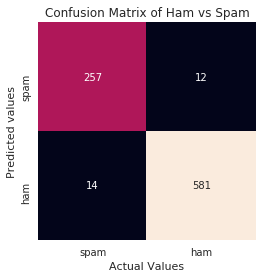

In [19]:
mat = confusion_matrix(y_test, KN_model_predict)
sns.heatmap(mat.T, square=True, fmt='d', annot=True, cbar=False, xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix of Ham vs Spam')

> <h3>Gaussian Generative Model</h3>

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
GNB_model = GaussianNB()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(email_x, email_y, random_state=0, train_size=0.8)

In [23]:
GNB_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [24]:
GNB_model_predict = GNB_model.predict(X_test)

In [25]:
accuracy_score(y_test, GNB_model_predict)

0.9155092592592593

In [26]:
GNB_model_cv_scores = cross_val_score(GNB_model, email_x, email_y, cv=30)
GNB_model_cv_scores.mean()

0.9390993824183478

In [27]:
GNB_model_one_out_scores = cross_val_score(GNB_model, email_x, email_y, cv=LeaveOneOut(len(email_x)))
GNB_model_one_out_scores.mean()

0.9416531604538088

Text(0.5,1,'Confusion Matrix of Ham vs Spam')

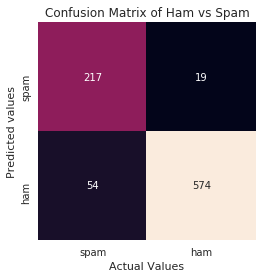

In [28]:
mat = confusion_matrix(y_test, GNB_model_predict)
sns.heatmap(mat.T, square=True, fmt='d', annot=True, cbar=False, xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix of Ham vs Spam')

> <h3>Support Vector Machines</h3>

In [29]:
from sklearn.svm import SVC

In [30]:
SVC_model = SVC(kernel='linear', C=1E10)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(email_x, email_y, random_state=0, train_size=0.8)

In [32]:
SVC_model.fit(X_train, y_train)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
SVC_model_predict = SVC_model.predict(X_test)

In [34]:
accuracy_score(y_test, SVC_model_predict)

0.9918981481481481

> <h3>Random Forests</h3>

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
RF_model = DecisionTreeClassifier()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(email_x, email_y, random_state=0, train_size=0.8)

In [38]:
RF_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
RF_model_predict = RF_model.predict(X_test)

In [40]:
accuracy_score(y_test, RF_model_predict)

0.9884259259259259

In [41]:
RF_model_cv_scores = cross_val_score(RF_model, email_x, email_y, cv=30) # ensuring the testing of all of the data
RF_model_cv_scores.mean()

0.9884335954594577

In [42]:
RF_model_one_out_scores = cross_val_score(RF_model, email_x, email_y, cv=LeaveOneOut(len(email_x)))
RF_model_one_out_scores.mean()

0.986107895346145

Text(0.5,1,'Confusion Matrix of Ham vs Spam')

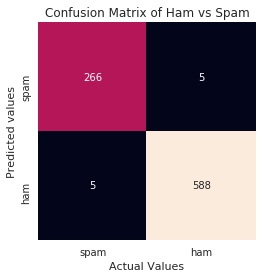

In [43]:
mat = confusion_matrix(y_test, RF_model_predict)
sns.heatmap(mat.T, square=True, fmt='d', annot=True, cbar=False, xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix of Ham vs Spam')

> <h3>MLP Classifier (Neural Network)</h3>

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
clf_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(email_x, email_y, random_state=0, train_size=0.8)

In [47]:
clf_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [48]:
clf_model_predict = clf_model.predict(X_test)

In [49]:
accuracy_score(y_test, clf_model_predict)

0.9895833333333334

In [50]:
clf_model_cv_scores = cross_val_score(clf_model, email_x, email_y, cv=30) # ensuring the testing of all of the data
clf_model_cv_scores.mean()

0.9909703132116926

Text(0.5,1,'Confusion Matrix of Ham vs Spam')

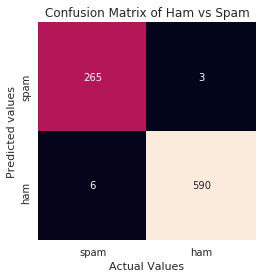

In [51]:
mat = confusion_matrix(y_test, clf_model_predict)
sns.heatmap(mat.T, square=True, fmt='d', annot=True, cbar=False, xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix of Ham vs Spam')

> <h3> Overall Model Comparison</h3>

In [52]:
# Model comparisons not including SVM because it is the least effecient model 
# Accuracy scores (using cross val score with cv=30):

print("KNeighbors Classification: " + str(KN_model_cv_scores.mean()))
print("Gaussian Generative Model: " + str(GNB_model_cv_scores.mean()))
print("Random Forests: " + str(RF_model_cv_scores.mean()))
print("MLP Classifier (Neural Network): " + str(clf_model_cv_scores.mean()))

KNeighbors Classification: 0.9703470603470602
Gaussian Generative Model: 0.9390993824183478
Random Forests: 0.9884335954594577
MLP Classifier (Neural Network): 0.9909703132116926


The best models for my dataset are the MLP Classifier (Neural Network) and Random Forests.